<h1>Predict the age of Abaolne by using K-Mean Clustering analysis</h1>

For this project, we are predicting the age of Abaolne. We use Python to complete this project, and we use K-Mean in this project. The dataset is from UCI database. The data inside the dataset need to clean by ourself. So we also have code for clean the dataset.



<h3>Read data</h3>
We read all the data inside "abalone.data" file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sb
import statsmodels.api as sm



In [3]:
data = pd.read_csv('abalone.data', sep=',',names=['Sex','Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight','Shell weight', 'Rings'])
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<h3>Clean dataset</h3>

In [4]:
data['Sex'] = data['Sex'].replace('M',1).replace('F',0).replace('I',2)
data


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<h3>EDA</h3>

<b>The pie chart below shows the the percentage of each sex of our abalone in the dataset. We can see that 31.3% are female, 36.6% is male and 32.1% are infant.

<AxesSubplot:title={'center':'Numbers of each sex'}, ylabel='Length'>

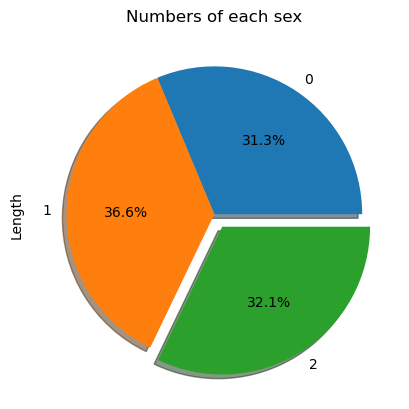

In [5]:
data.groupby('Sex').count()['Length'].plot.pie(y = 'Numbers', title = 'Numbers of each sex', autopct = '%1.1f%%', explode = (0,0,0.1), shadow = True, startangle = 0)

<h3>For 8 of the graph below, we want to find out the average and how the data was distributed. So we use box chart.

<b>This plot under is the number of interval occurrences about each length of abalone.

<AxesSubplot:>

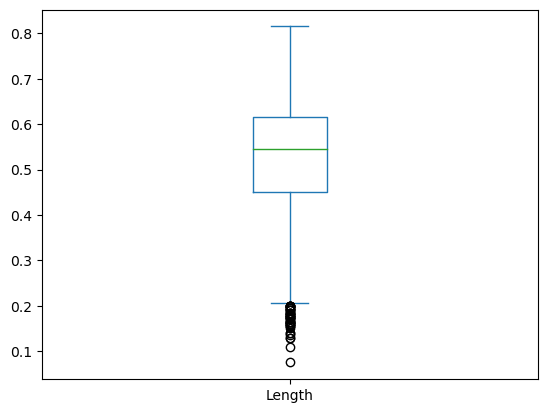

In [6]:
data['Length'].plot(kind = 'box')

<b>  Most of the abalone length is in the range of 0.4 to 0.6 with few outliers, and the average of the length is around 0.55.

This plot under is the number of interval occurrences about each diameter of abalone.

<AxesSubplot:>

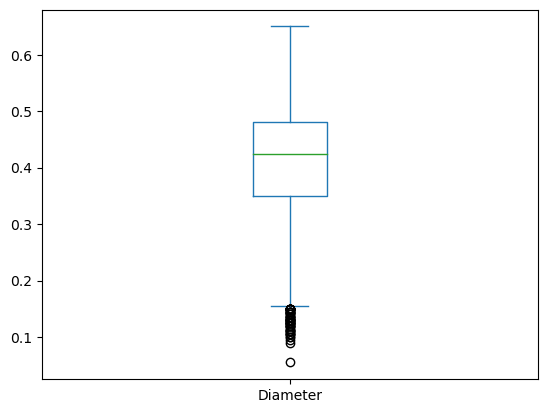

In [7]:
data['Diameter'].plot(kind = 'box')

<b> most of the abalone diameter is in the range 0.35 to 0.49 with few outliers. and the average for the diameter is around 0.42

This plot under is the number of interval occurrences about each height of abalone.

<AxesSubplot:>

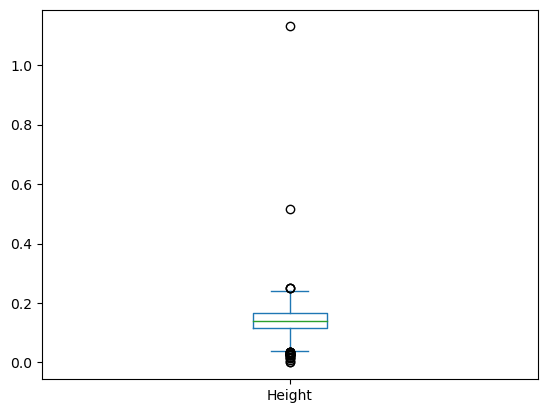

In [8]:
data['Height'].plot(kind = 'box')

<b> Most of the abalone height is in the range of 0.1 to 0.2 with few outliers. The average for the height is about 0.15

This plot under is the number of interval occurrences about each whole weight of abalone.

<AxesSubplot:>

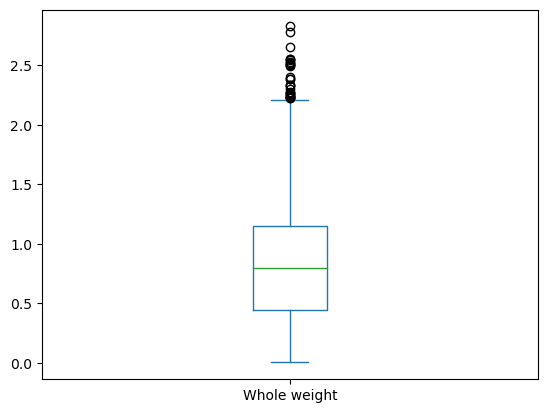

In [9]:
data['Whole weight'].plot(kind = 'box')

<b>Most of the abalone whole weight is in the range of 0.5 to 1.3 with few outliers. The average for the whole weight is about 0.55.

This plot under is the number of interval occurrences about each shucked weight of abalone.

<AxesSubplot:>

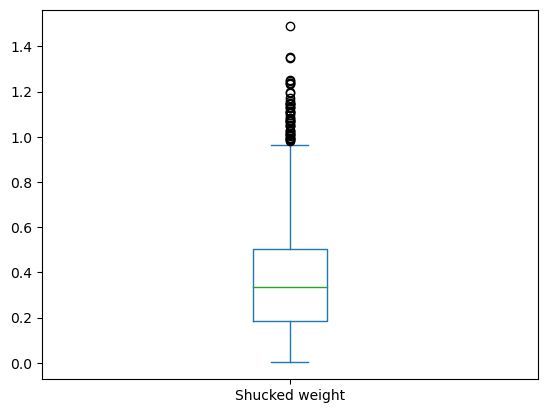

In [10]:
data['Shucked weight'].plot(kind = 'box')

<b> Most of the abalone shucked weight is in the range of 0.2 to 0.5 with few outliers. The average for the shucked weight is arount 0.35

This plot under is the number of interval occurrences about each viscrea weight of abalone.

<AxesSubplot:>

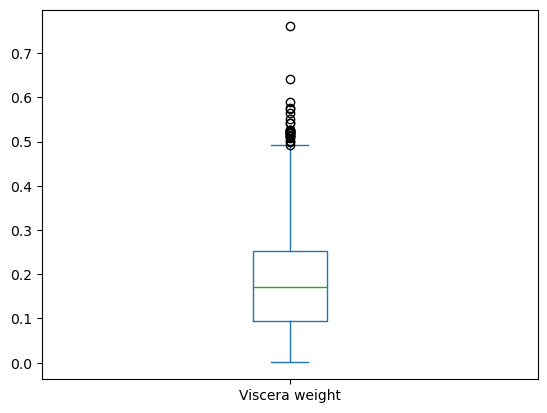

In [11]:
data['Viscera weight'].plot(kind = 'box')

<b> Most of the abalone viscera weight is in the range 0.1 to 0.27 with few outliers. The average for viscera weight is arount 0.17

This plot under is the number of interval occurrences about each shell weight of abalone.

<AxesSubplot:>

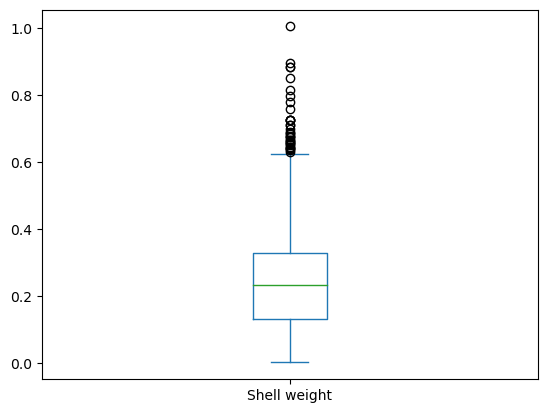

In [12]:
data['Shell weight'].plot(kind = 'box')

<b> Most of the abalone shell weight is in the range of 0.18 to 0.32 with few outliers. The average for the shell weight is around 0.22.

This plot under is the number of interval occurrences about each rings(age) of abalone.

<AxesSubplot:>

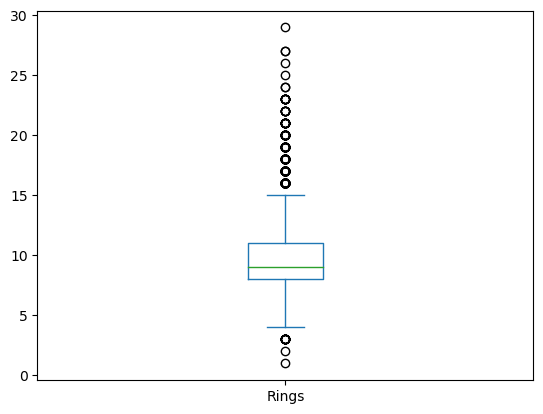

In [13]:
data['Rings'].plot(kind = 'box')

<b>Most of the abalone rings is in the range of 8 to 12 with few outliers. The average for the rings is around 9.

<h3>K-Mean Clustering</h3>
We choose the best K value by finding the huge reduction in variation with the minimum mean square error.

In [14]:
X = data.drop("Rings", axis=1)
y = data["Rings"]

<b>We split the data into two group, 20% for testing, 80% for training.</b>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 123123)

<b>The graph show under is to show different k value of MSE(Mean Square Error)</b>

<AxesSubplot:>

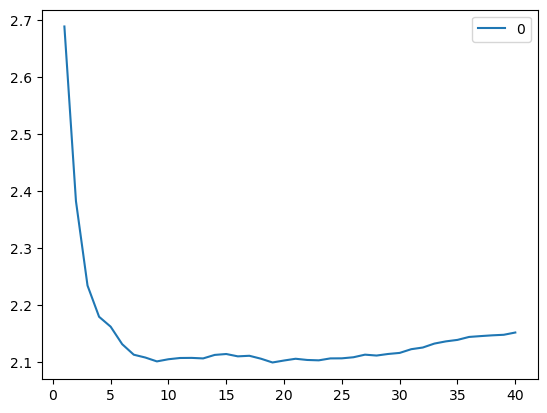

In [16]:
rmse_val = []
for k in range(40):
    k += 1
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    rmse = sqrt(mean_squared_error(y_test, knn_model.predict(X_test)))
    rmse_val.append(rmse)

error = pd.DataFrame(rmse_val)
error.index += 1
error.plot()


<b>This graph show under is about the number of cluster by using each k value.</b>

<AxesSubplot:>

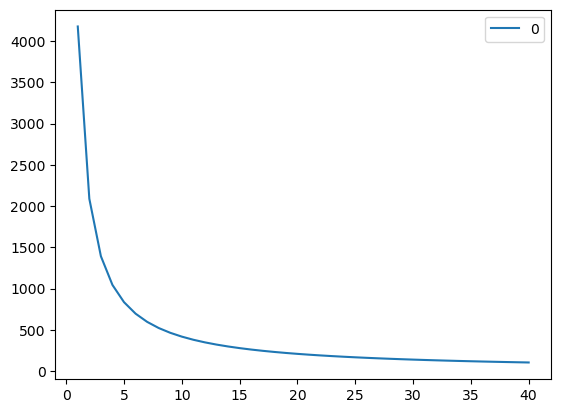

In [17]:
#4177 total
total = 4177
reduction = []
for k in range(40):
    k += 1
    reduction.append(total / k)
redu = pd.DataFrame(reduction)
redu.index += 1
redu.plot()

<b>In this case, k = 1 give us the highest rmse value. and k = 6 is the elbow, and the decline is not as obvious after 6 and it has a small mse, so we assume k = 6 is the best for our dataset.</b>

In [18]:
knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

<h3>More EDA</h3>

<b>The graph under shows the relation between length and rings.</b>

<b>As we can see, when the length increase, the rings also increase.</b>

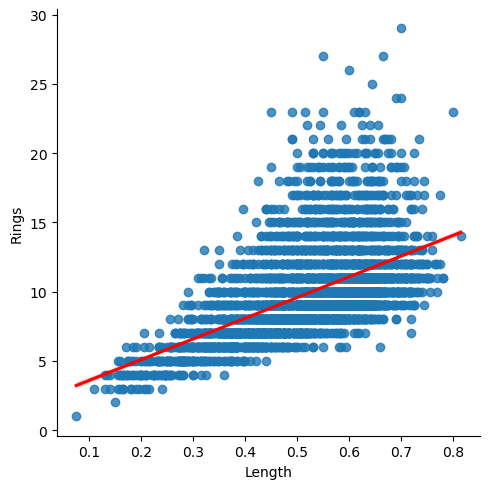

In [19]:
sb.lmplot(x='Length',y='Rings',data=data,fit_reg=True,line_kws={'color': 'red'}) 

<b>The graph under shows the relation between diameter and rings.</b>

<b>As we can see, when the diameter increase, the rings also increase.</b>

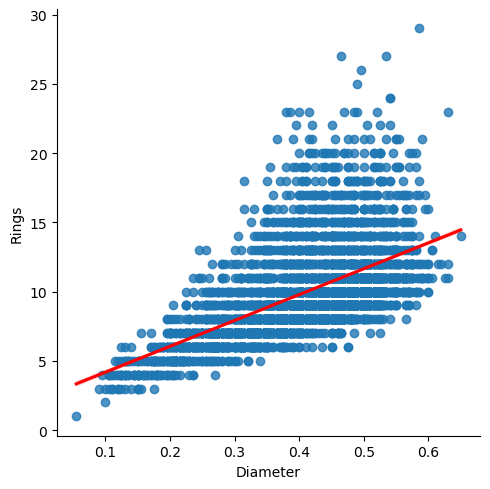

In [20]:
sb.lmplot(x='Diameter',y='Rings',data=data,fit_reg=True,line_kws={'color': 'red'}) 

<b>The graph under shows the relation between height and rings.</b>

<b>As we can see, when the height increase, the rings also increase.</b>

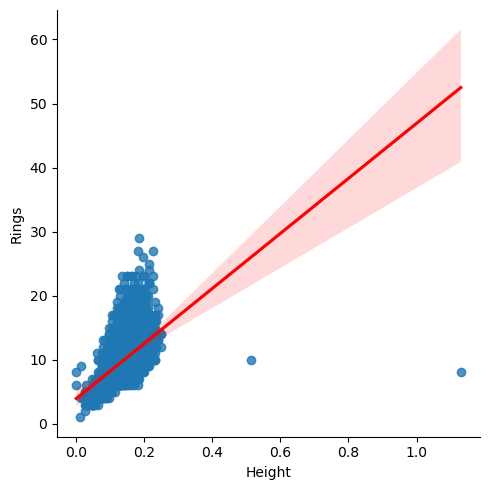

In [21]:
sb.lmplot(x='Height',y='Rings',data=data,fit_reg=True,line_kws={'color': 'red'}) 

<b>The graph under shows the relation between whole weight and rings.</b>

<b>As we can see, when the whole weight increase, the rings also increase.</b>

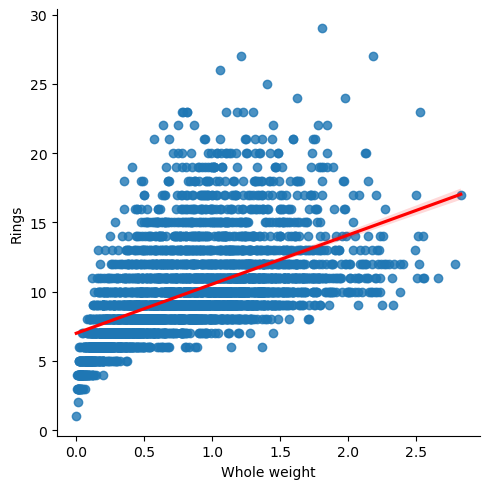

In [22]:
sb.lmplot(x='Whole weight',y='Rings',data=data,fit_reg=True,line_kws={'color': 'red'}) 


<b>The graph under shows the relation between shucked weight and rings.</b>

<b>As we can see, when the shucked weight increase, the rings also increase.</b>

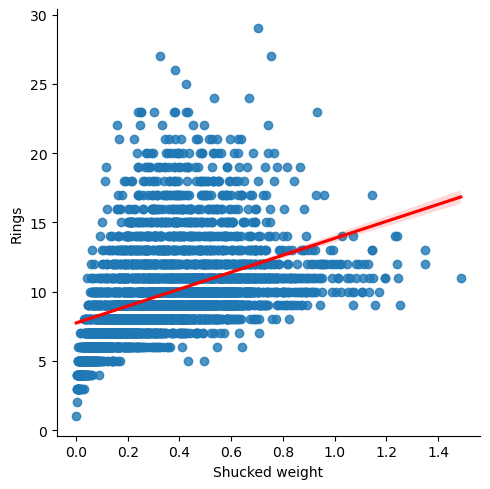

In [23]:
sb.lmplot(x='Shucked weight',y='Rings',data=data,fit_reg=True,line_kws={'color': 'red'}) 

<b>The graph under shows the relation between viscera weight and rings.</b>

<b>As we can see, when the viscera weight increase, the rings also increase.</b>

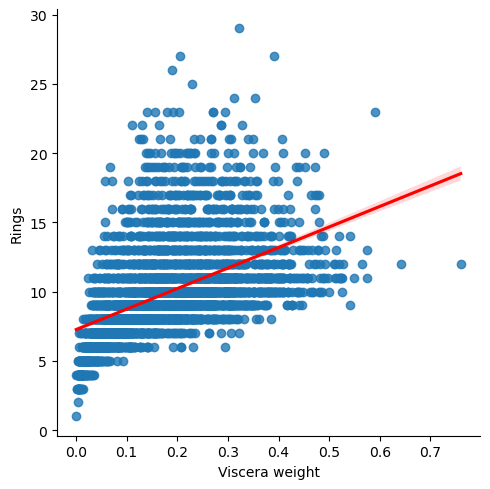

In [24]:
sb.lmplot(x='Viscera weight',y='Rings',data=data,fit_reg=True,line_kws={'color': 'red'}) 

<b>The graph under shows the relation between shell weight and rings.</b>

<b>As we can see, when the shell weight increase, the rings also increase.</b>

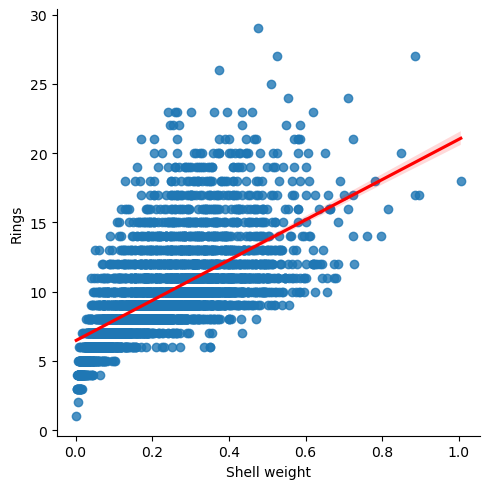

In [25]:
sb.lmplot(x='Shell weight',y='Rings',data=data,fit_reg=True,line_kws={'color': 'red'}) 

<h3>Test</h3>
<b>Input 'Sex', 'Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight','Shell weight' to predict the Rings which is the age.</b>

In [26]:
x = [[1,0.6, 0.4, 0.2, 1, 0.3, 0.2, 0.3]]
knn_model.predict(x)


/home/hiroyoshi/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([15.5])

In [27]:
y = [[0,0.6, 0.4, 0.2, 1, 0.3, 0.2, 0.3]]
knn_model.predict(y)

/home/hiroyoshi/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([14.33333333])

<b>In this example, 1 is the sex(male), 0.6 is the length, 0.4 is the diameter, 0.2 is the height, 1 is the whole weight, 0.3 is the shucked weight, 0.2 is the viscera weight, and 0.3 is the shell weight.  We get that the Abalone is about 15.5 rings.</b>
<b>For the second one, 0 is the sex(female), and we get 14.3 as the rings.

In [35]:
a = [[2,0.6, 0.4, 0.2, 1, 0.3, 0.2, 0.3]]
knn_model.predict(a)

/home/hiroyoshi/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([12.5])

<b> In this one, we have the same size and weight but the sex is infant. as we can see, the infant with the same size and weight is younger than male and female.

In [36]:
z = [[0,0.4, 0.3, 0.1, 1.2, 0.2, 0.4, 0.3]]
knn_model.predict(z)

/home/hiroyoshi/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([13.83333333])

<b> In this one, the size of the female is smaller than the second one. and it's also younger than that one.

<h3>Q1: Can the sizes of female abalones and male abalones be different?</h3>

To find out the answer, We find the average size of male and female of abalone. We can see that the length, diameter and height of female abalone is bigger than the male by a little bit.

In [30]:
F_data = data[data['Sex'] == 0]
M_data = data[data['Sex'] == 1]
frames = [M_data.T.loc['Length':'Height'].mean(axis=1), F_data.T.loc['Length':'Height'].mean(axis=1)]


<b>The code and graph under is compare the male and female.</b>

<AxesSubplot:>

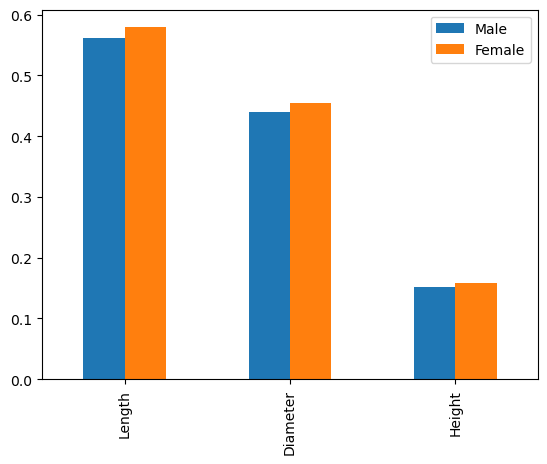

In [31]:
result = pd.concat(frames, axis = 1)
result.rename(columns = {0:'Male',1:'Female'}, inplace = True)
result.plot(kind = 'bar')

<b>From the graph we can know that female abalone is bigger than male abalone.</b>

In [32]:
M_data.T.loc['Length':'Height'].mean(axis=1)

Length      0.561391
Diameter    0.439287
Height      0.151381
dtype: float64

<b>The average of female abalone is bigger than the male abalone data.(Length, Diameter, Height)</b>

<h3>Q2: When the weight of shell increase, will the abalone weight(without the shell) also increase?</h3>

To figure this out, we have to plot the weight of shell with the weight of abalone. After plotting it, we found out that the weight of shell increase the abalone weight also increase

<b>The code and graph under is compare the Shell weight and Shucked weight.</b>

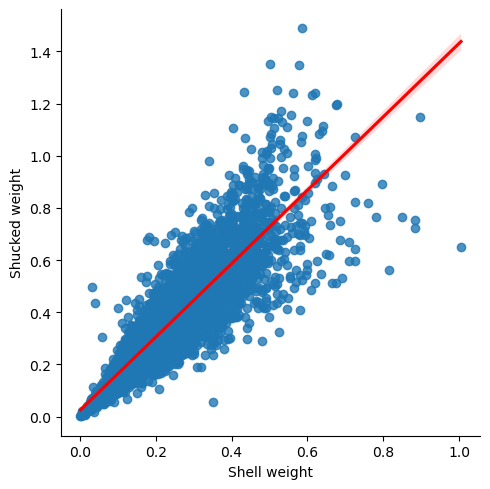

In [33]:
sb.lmplot(x='Shell weight',y='Shucked weight',data=data,fit_reg=True,line_kws={'color': 'red'}) 

<b>From the graph we know that the shell weight and the shucked weight is positively correlated</b>

<h3>Q3: When the size increase, will the age also increase?</h3>

To figure this question out we have to plot the Length, Diameter and Height with Rings(age), after plotting it, we found out that the size of abalone increase, the age will also increase

<b>The code and graph under is show the relation between the size and the rings.</b>

<b>There are three graph under.</b>
1. the first graph is about length and rings
2. the second graph is about diameter and rings
3. the third graph is about height and rings

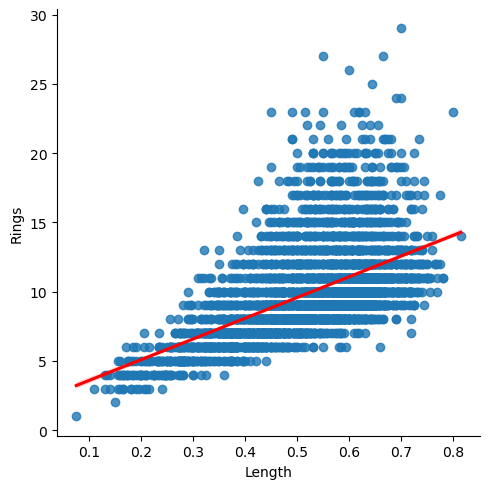

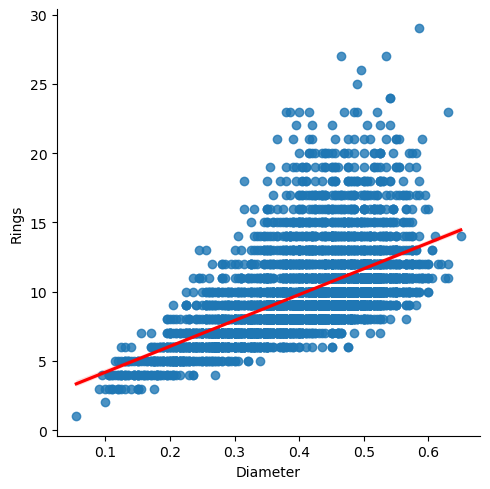

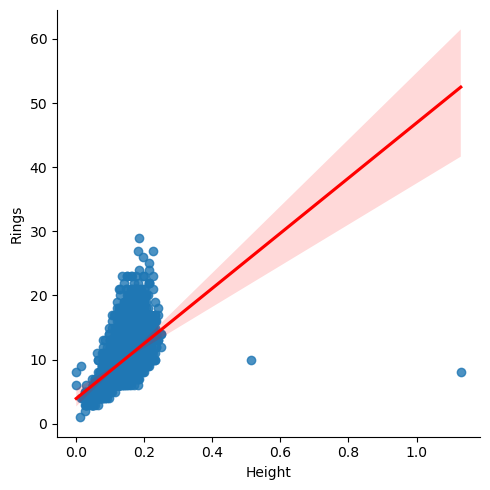

In [34]:
sb.lmplot(x='Length',y='Rings',data=data,fit_reg=True,line_kws={'color': 'red'}) 
sb.lmplot(x='Diameter',y='Rings',data=data,fit_reg=True,line_kws={'color': 'red'}) 
sb.lmplot(x='Height',y='Rings',data=data,fit_reg=True,line_kws={'color': 'red'}) 

1. From the graph we can know that length and rings is positively correlated.
2. From the graph we can know that diameter and rings is positively correlated.
3. From the graph we can know that height and rings is positively correlated. And we can know that the height of almost all abalone is concentrated between 0 and 0.3

<b>Heming   Guan      20%</b>

<b>Shengzhe Wen       20%</b>

<b>Junwei   Yan       20%</b>

<b>Haoyi    Ao        20%</b>

<b>Shan     Jiang     20%</b>